# Portfolio Project: Marketing Data Analysis

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')

## Introduction
The main goal of this project is analyzing some marketing data. An Exploratory Data Analysis will be performed for some significant variables from the marketing data, and some interesting patterns and insights of the data will be interpreted clearly and concisely.<br>
It can be found more information about the dataset on this link: [https://www.kaggle.com/jackdaoud/marketing-data](https://www.kaggle.com/jackdaoud/marketing-data)

## Loading Data
In this step, some exploratory data analysis is performed to the given data set in order to find some interesting insights, such as detection of missing data, the type of variables the data set has, the distribution for each variable, and how correlated these variables are with each other.

In [2]:
marketing = pd.read_csv("marketing_data.csv")
pd.set_option('display.max_columns',None)
marketing.head()

id  YearBirth   Education MaritalStatus       Income  Kidhome  Teenhome  \
0   1826       1970  Graduation      Divorced  $84,835.00         0         0   
1      1       1961  Graduation        Single  $57,091.00         0         0   
2  10476       1958  Graduation       Married  $67,267.00         0         1   
3   1386       1967  Graduation      Together  $32,474.00         1         1   
4   5371       1989  Graduation        Single  $21,474.00         1         0   

  DtCustomer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0    6/16/14        0       189        104              379              111   
1    6/15/14        0       464          5               64                7   
2    5/13/14        0       134         11               59               15   
3    5/11/14        0        10          0                1                0   
4     4/8/14        0         6         16               24               11   

   MntSweetProducts  MntGoldProducts  NumDealsPurchases  NumWebPurchases  \
0               189              218                  1                4   
1                 0               37                  1                7   
2                 2               30                  1                3   
3                 0                0                  1                1   
4                 0               34                  2                3   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                    4                  6                  1             0   
1                    3                  7                  5             0   
2                    2                  5                  2             0   
3                    0                  2                  7             0   
4                    1                  2                  7             1   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  Complain  \
0             0             0             0             0         1         0   
1             0             0             0             1         1         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         1         0   

  Country  
0      SP  
1      CA  
2      US  
3     AUS  
4      SP

### Data Information

In [3]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   2240 non-null   int64 
 1   YearBirth            2240 non-null   int64 
 2   Education            2240 non-null   object
 3   MaritalStatus        2240 non-null   object
 4   Income               2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   DtCustomer           2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProducts      2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [4]:
marketing.isnull().sum()

id                      0
YearBirth               0
Education               0
MaritalStatus           0
Income                 24
Kidhome                 0
Teenhome                0
DtCustomer              0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProducts         0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [5]:
marketing.describe()

id    YearBirth      Kidhome     Teenhome      Recency  \
count   2240.000000  2240.000000  2240.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804     0.444196     0.506250    49.109375   
std     3246.662198    11.984069     0.538398     0.544538    28.962453   
min        0.000000  1893.000000     0.000000     0.000000     0.000000   
25%     2828.250000  1959.000000     0.000000     0.000000    24.000000   
50%     5458.500000  1970.000000     0.000000     0.000000    49.000000   
75%     8427.750000  1977.000000     1.000000     1.000000    74.000000   
max    11191.000000  1996.000000     2.000000     2.000000    99.000000   

          MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count  2240.000000  2240.000000      2240.000000      2240.000000   
mean    303.935714    26.302232       166.950000        37.525446   
std     336.597393    39.773434       225.715373        54.628979   
min       0.000000     0.000000         0.000000         0.000000   
25%      23.750000     1.000000        16.000000         3.000000   
50%     173.500000     8.000000        67.000000        12.000000   
75%     504.250000    33.000000       232.000000        50.000000   
max    1493.000000   199.000000      1725.000000       259.000000   

       MntSweetProducts  MntGoldProducts  NumDealsPurchases  NumWebPurchases  \
count       2240.000000      2240.000000        2240.000000      2240.000000   
mean          27.062946        44.021875           2.325000         4.084821   
std           41.280498        52.167439           1.932238         2.778714   
min            0.000000         0.000000           0.000000         0.000000   
25%            1.000000         9.000000           1.000000         2.000000   
50%            8.000000        24.000000           2.000000         4.000000   
75%           33.000000        56.000000           3.000000         6.000000   
max          263.000000       362.000000          15.000000        27.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count          2240.000000        2240.000000        2240.000000   
mean              2.662054           5.790179           5.316518   
std               2.923101           3.250958           2.426645   
min               0.000000           0.000000           0.000000   
25%               0.000000           3.000000           3.000000   
50%               2.000000           5.000000           6.000000   
75%               4.000000           8.000000           7.000000   
max              28.000000          13.000000          20.000000   

       AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
count   2240.000000   2240.000000   2240.000000   2240.000000   2240.000000   
mean       0.072768      0.074554      0.072768      0.064286      0.013393   
std        0.259813      0.262728      0.259813      0.245316      0.114976   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Response     Complain  
count  2240.000000  2240.000000  
mean      0.149107     0.009375  
std       0.356274     0.096391  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000

Based on the outputs above, we can notice some insights:
1. The dataset consists of 2240 rows (observations) and 28 columns (variables).
2. The majority of the variables are integers.
3. The `income` variable is declared as an object and has some missing values (24), which requires some cleaning to conduct EDA.
4. The column names need to be renamed to meaningful purposes.
5. We can use summary statistics on numerical variables.

### Data Cleaning

In [6]:
marketing['Income'] = marketing['Income'].replace('[\$,]','',regex=True).astype('float')
marketing.columns = [re.sub(r'(?<!^)(?=[A-Z])','_',i).lower() for i in marketing.columns]

In [7]:
marketing['income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: income, dtype: float64

<IPython.core.display.Javascript object>


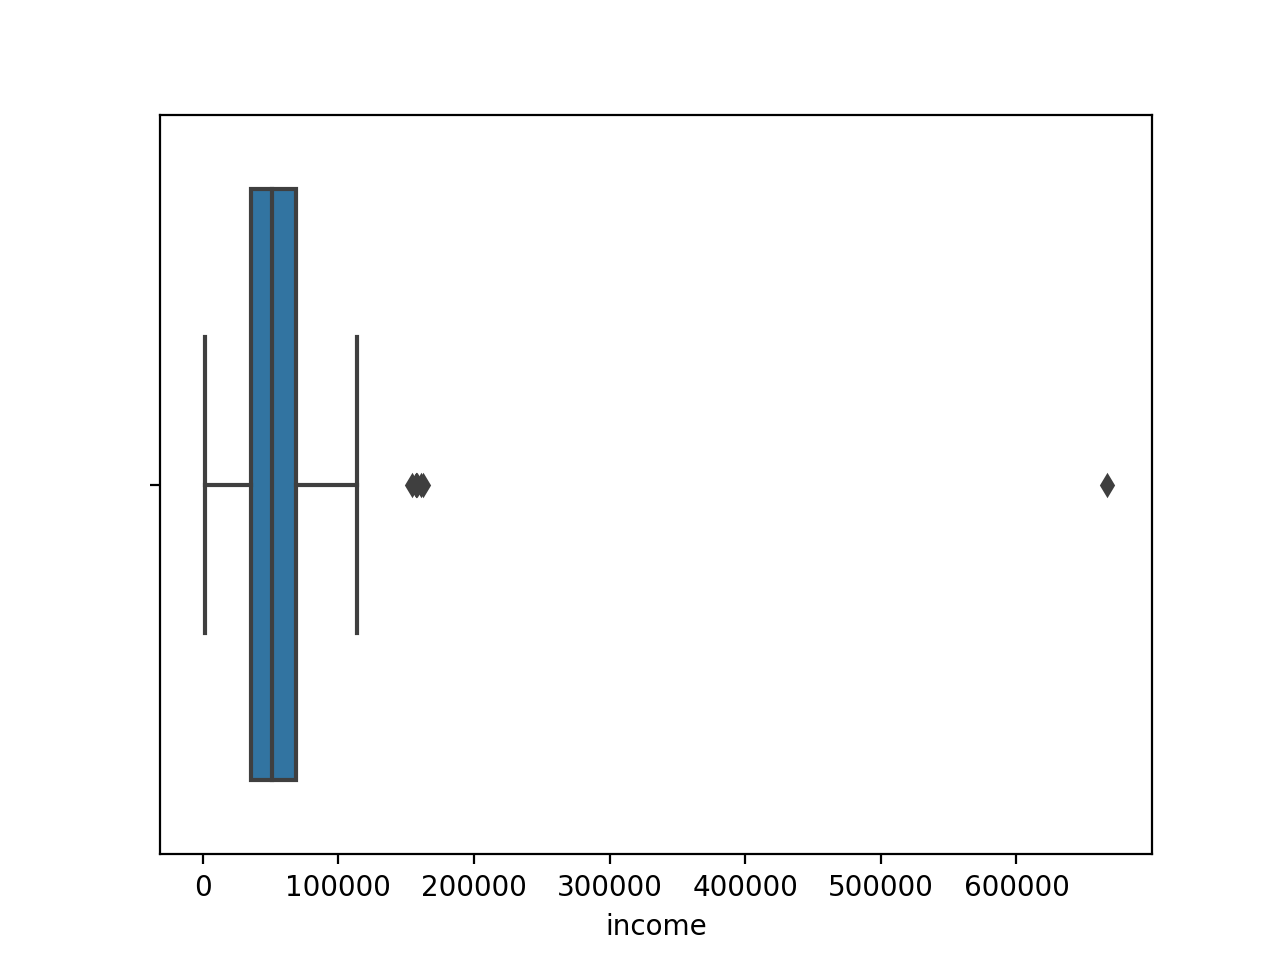

In [8]:
plt.figure()
sns.boxplot(marketing['income'])
plt.show()

We can see that the `income` variable has an outlier greater than \$600,000; we can partition the data such that `income` is below \$300,000.

<IPython.core.display.Javascript object>


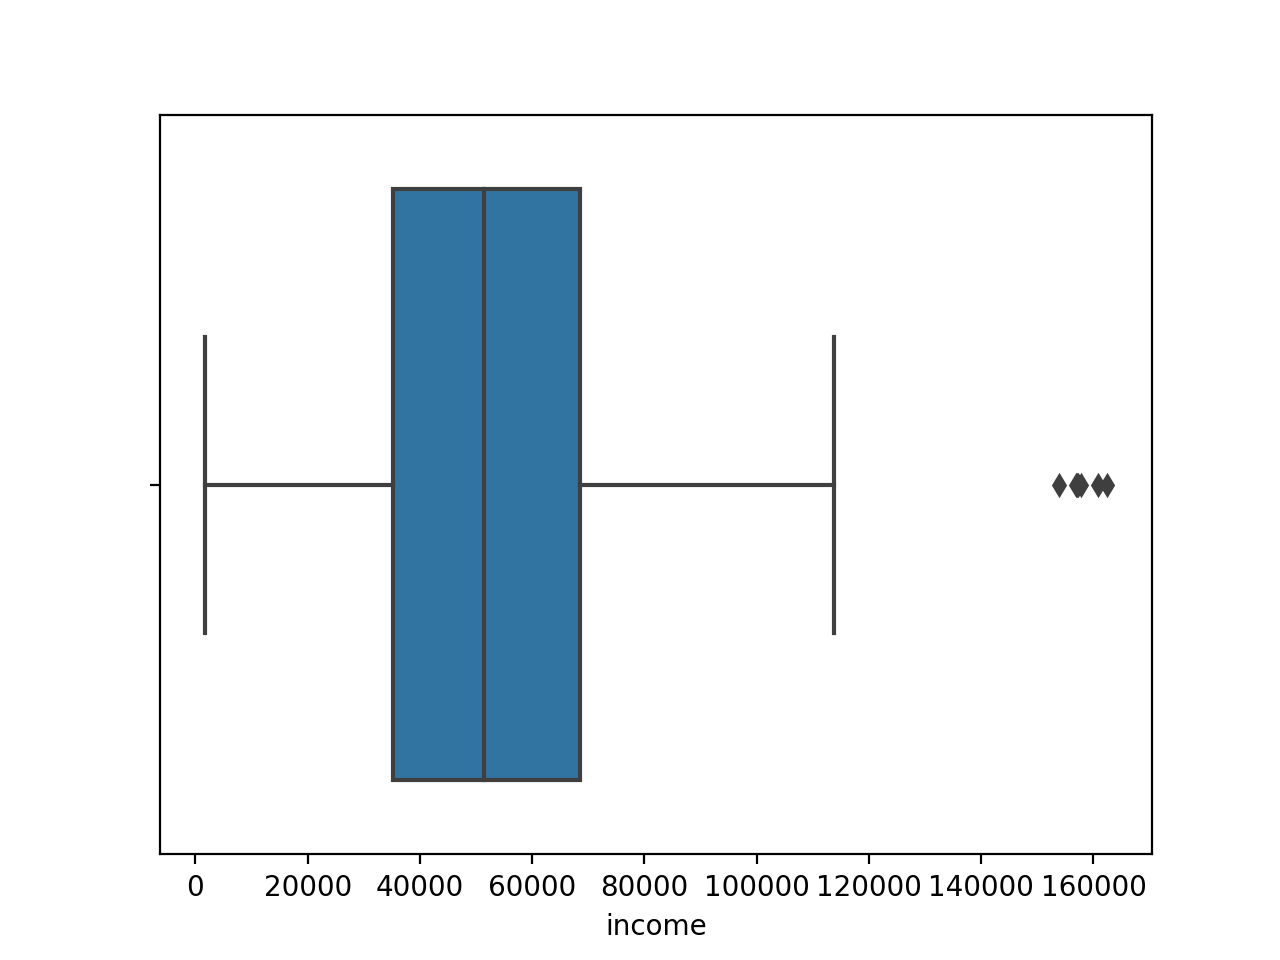

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

In [9]:
marketing = marketing[marketing['income'] < 300000]
plt.figure()
sns.boxplot(marketing['income'])
plt.show()
marketing['income'].describe()

Now that the outlier from the `income` variable has been removed, the next step is replacing its missing values by the `income` mean, so it is ready for some Exploratory Data Analysis.

In [10]:
marketing['income'] = marketing['income'].fillna(marketing['income'].mean())
marketing['income'].describe()

count      2215.000000
mean      51969.861400
std       21526.320095
min        1730.000000
25%       35284.000000
50%       51373.000000
75%       68487.000000
max      162397.000000
Name: income, dtype: float64

### Creating an Age Column

This dataset contains a column named `year_birth`; we can create an `age` column for every customer by subtracting the age of the customers from the current year. This is done for the analysis simplicity purpose.

In [11]:
marketing['age'] = 2020 - marketing['year_birth']

<IPython.core.display.Javascript object>


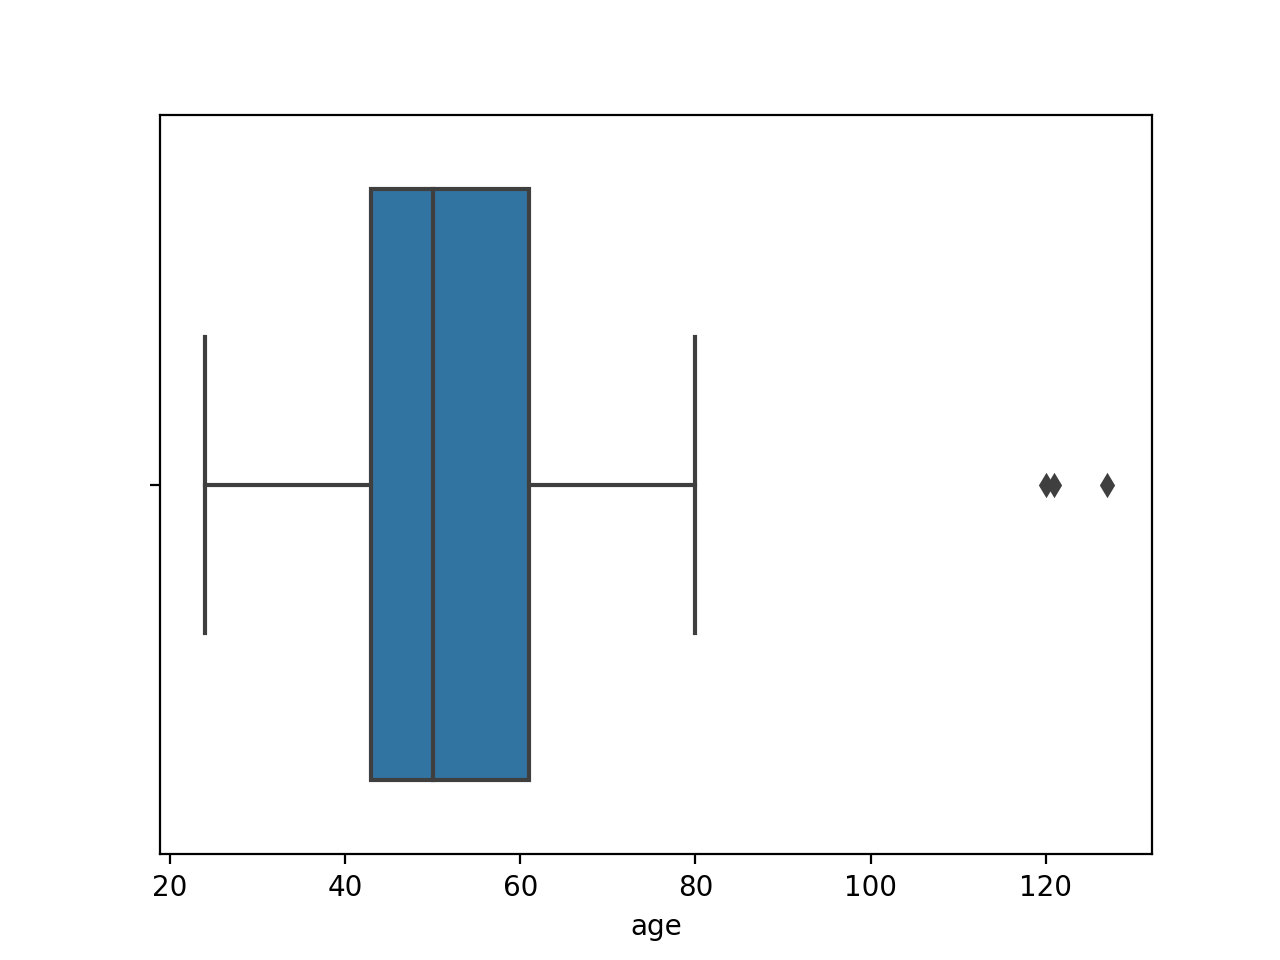

In [12]:
plt.figure()
sns.boxplot(marketing['age'])
plt.show()

Based on this boxplot for `age`, we can see that there are some outliers which implies that there are customers whose age is greater than 120 years. We need to partition the data such that `age` is less than 100 years.

<IPython.core.display.Javascript object>


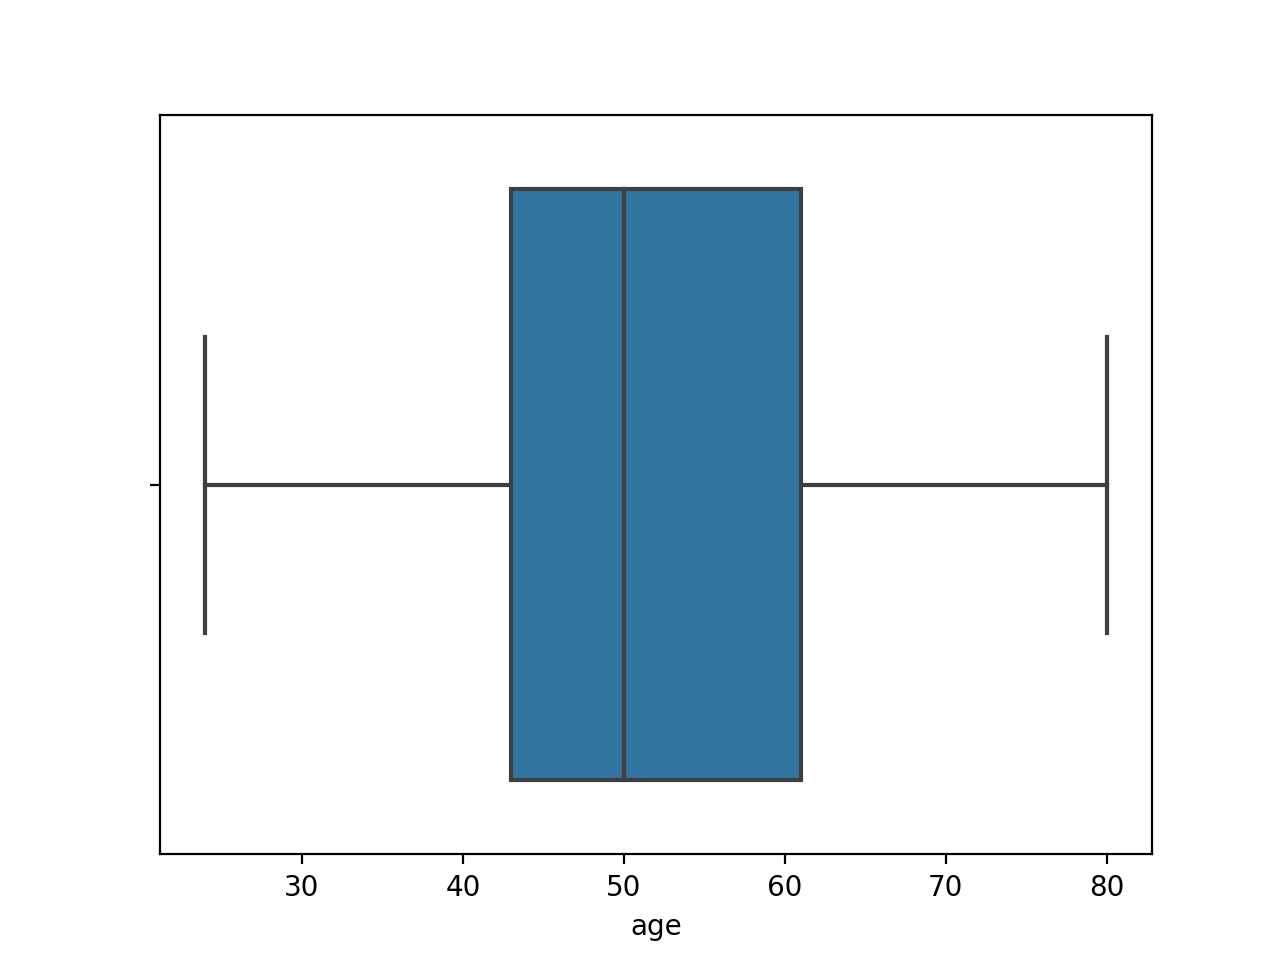

count    2212.000000
mean       51.086347
std        11.701599
min        24.000000
25%        43.000000
50%        50.000000
75%        61.000000
max        80.000000
Name: age, dtype: float64

In [13]:
marketing = marketing[marketing['age'] < 100]
plt.figure()
sns.boxplot(marketing['age'])
plt.show()
marketing['age'].describe()

Now that the outliers have been removed, the `age` variable is ready for analysis.

### Education Variable Analysis

The `education` column is another variable for Exploratory Data Analysis; it seems that there are no issues that need to be dealt with.

<IPython.core.display.Javascript object>


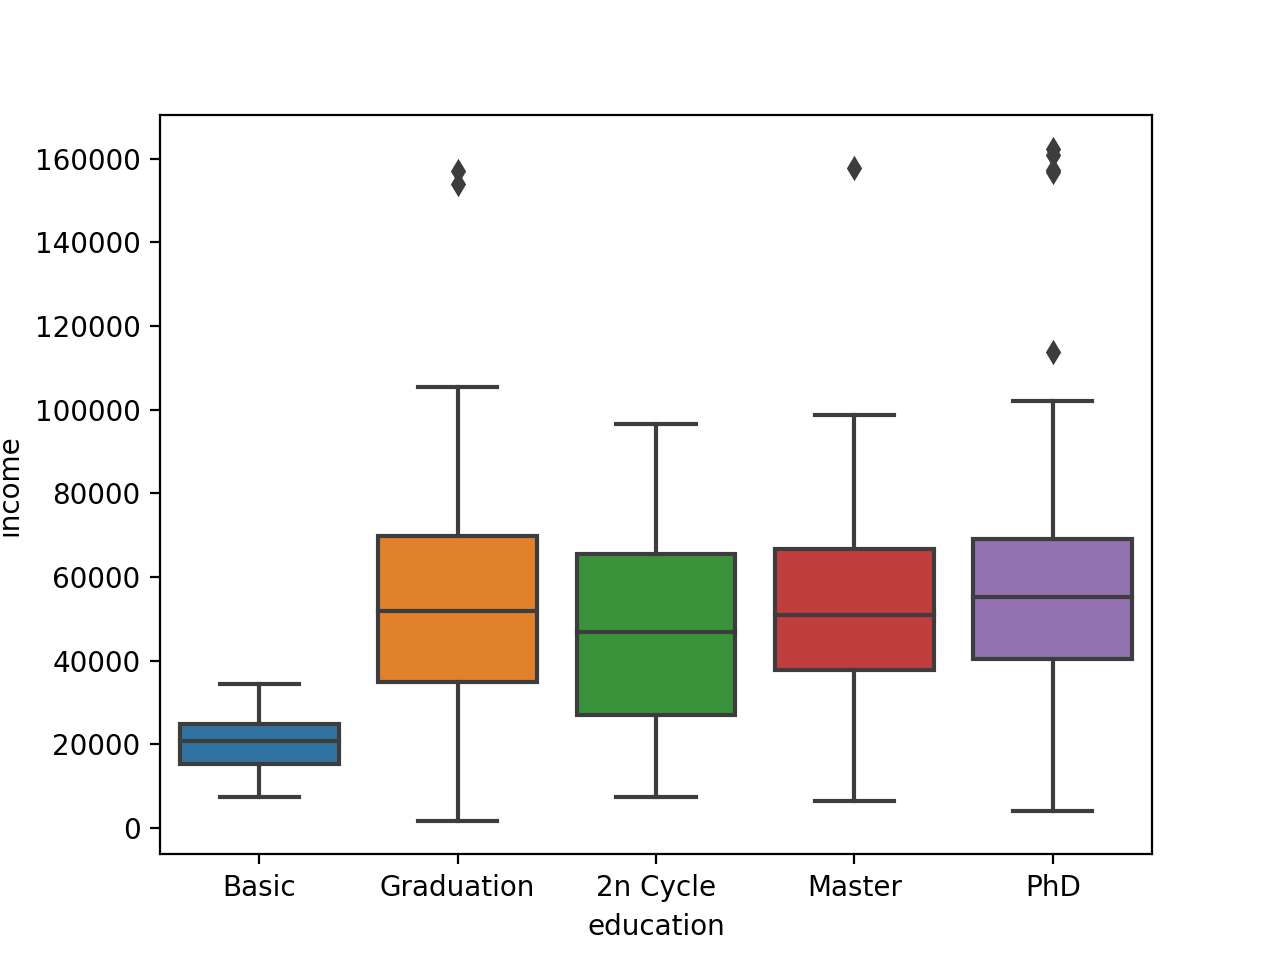

In [14]:
plt.figure()
sns.boxplot(marketing['education'],marketing['income'],
           order = ['Basic','Graduation','2n Cycle','Master','PhD'])
plt.show()

## Exploratory Data Analysis

Now that all the variables in the dataset are tidy and clean, the dataset is ready for EDA.

### Data As a Whole

There are several ways to analyze every single variable of the dataset at the same time; in this porject, the Exploratory Data Analysis will conduct some visualization techniques, such as ploting histograms and creating heatmaps for numerical variables in order to determine the correlation and association between each variable.

<IPython.core.display.Javascript object>


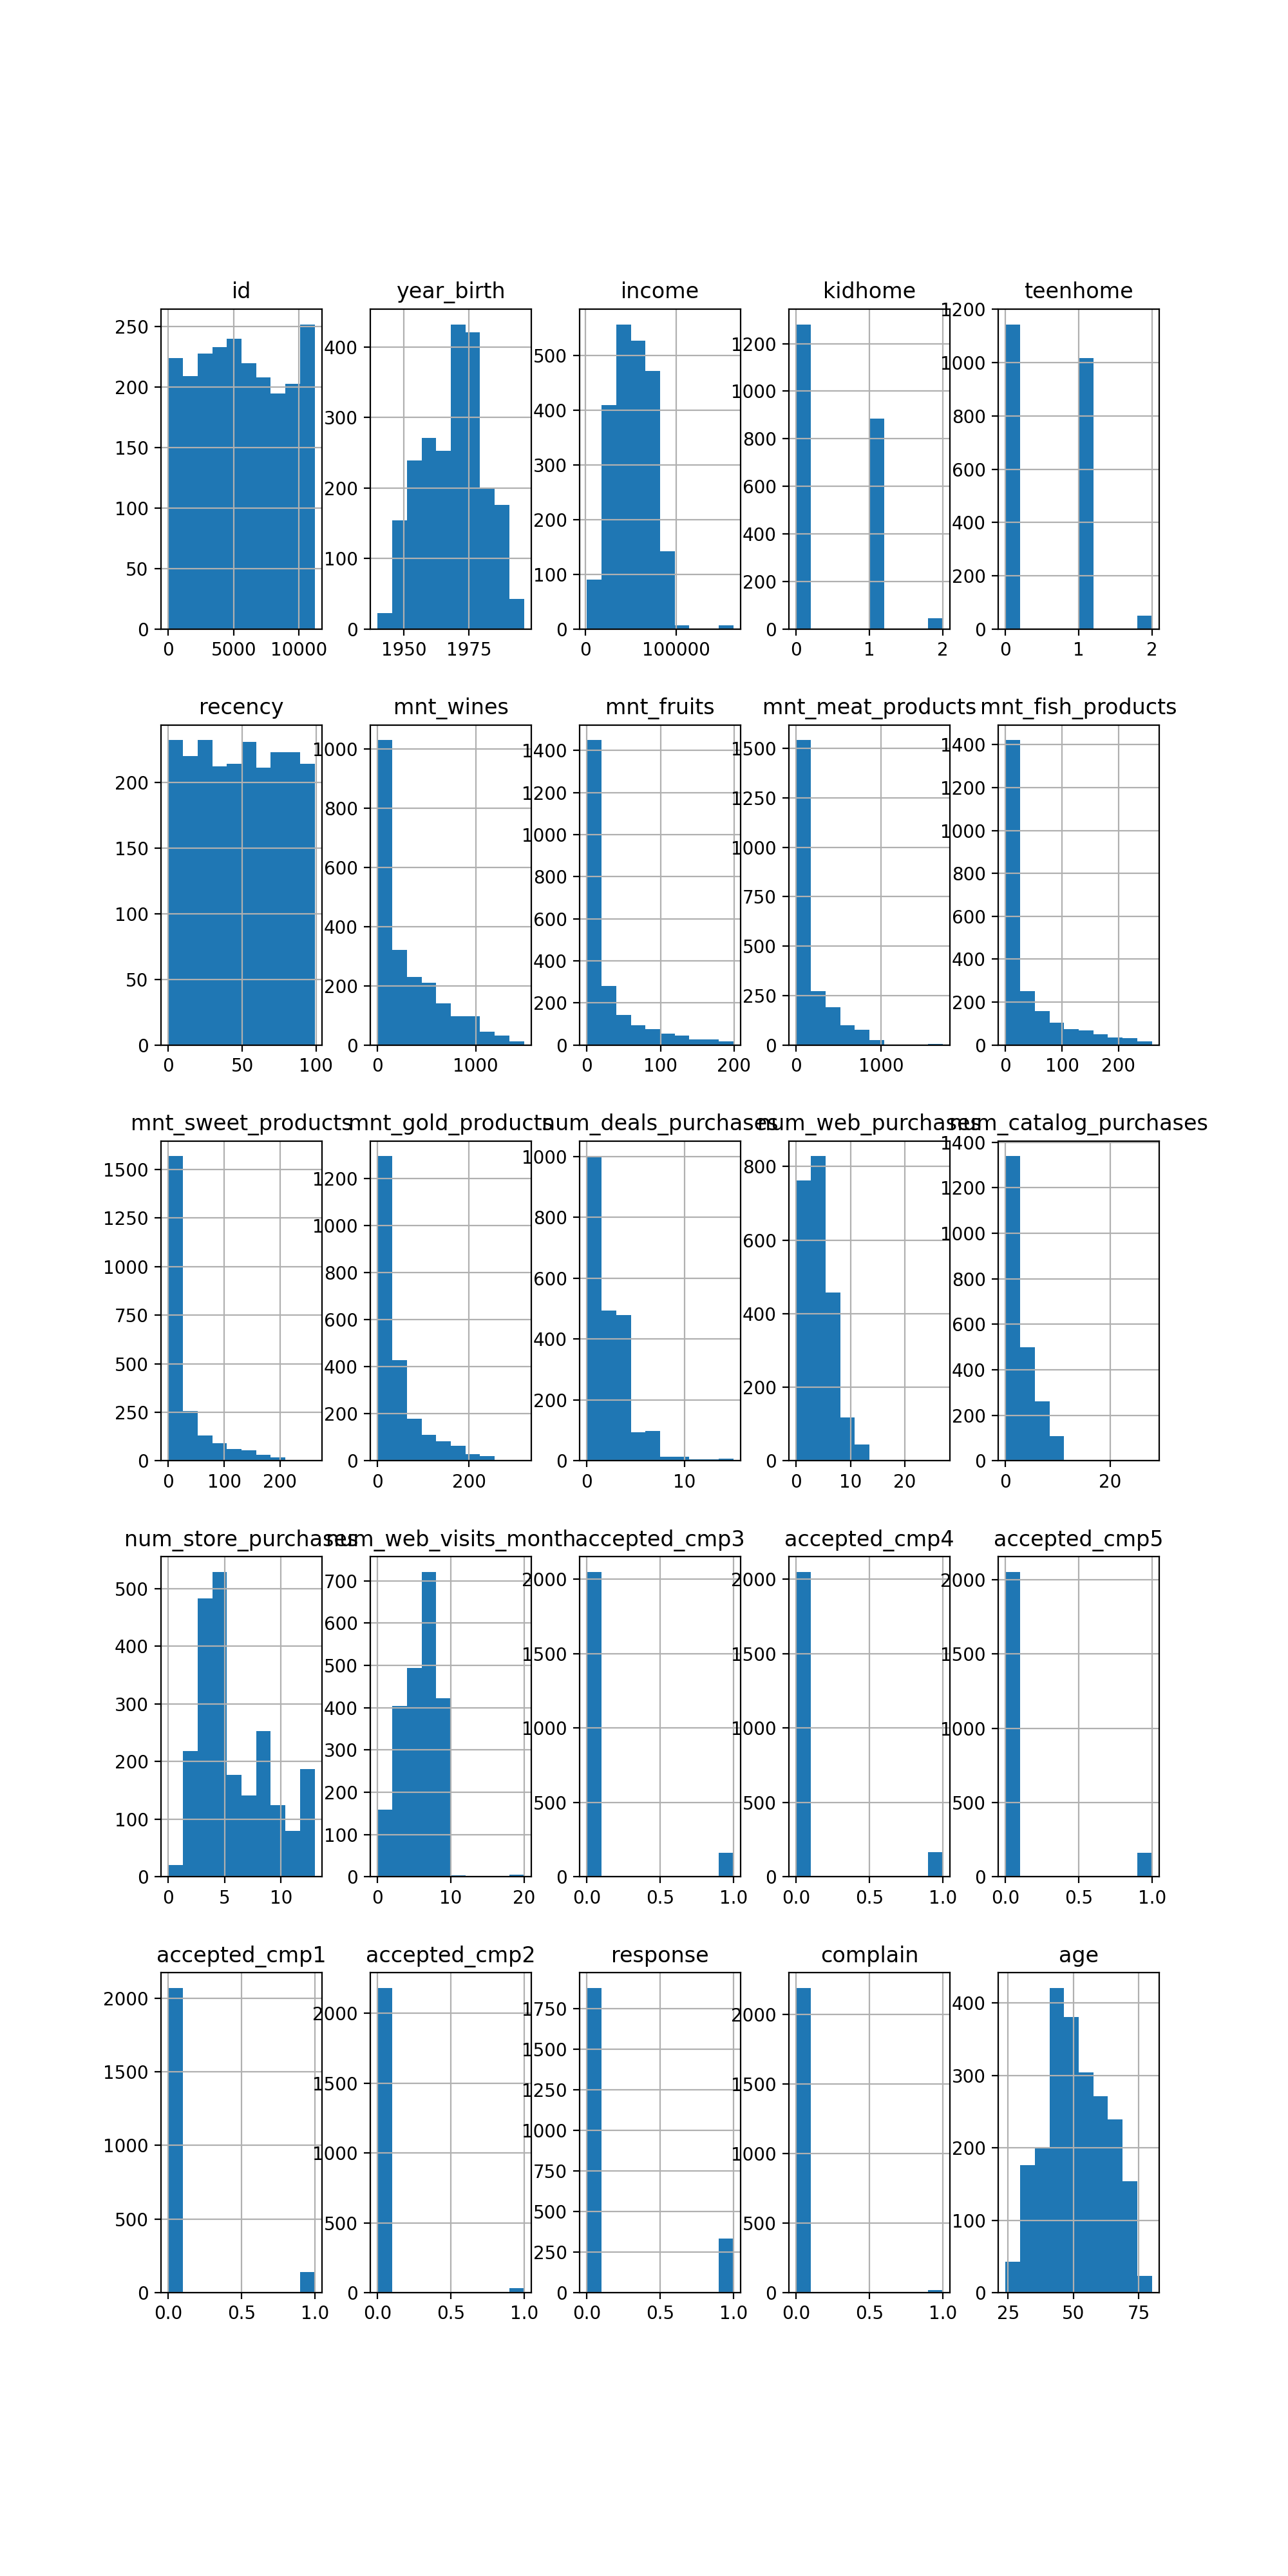

In [16]:
fig = plt.figure(figsize = (10,20))
ax = fig.gca()
marketing.hist(ax = ax);

<IPython.core.display.Javascript object>


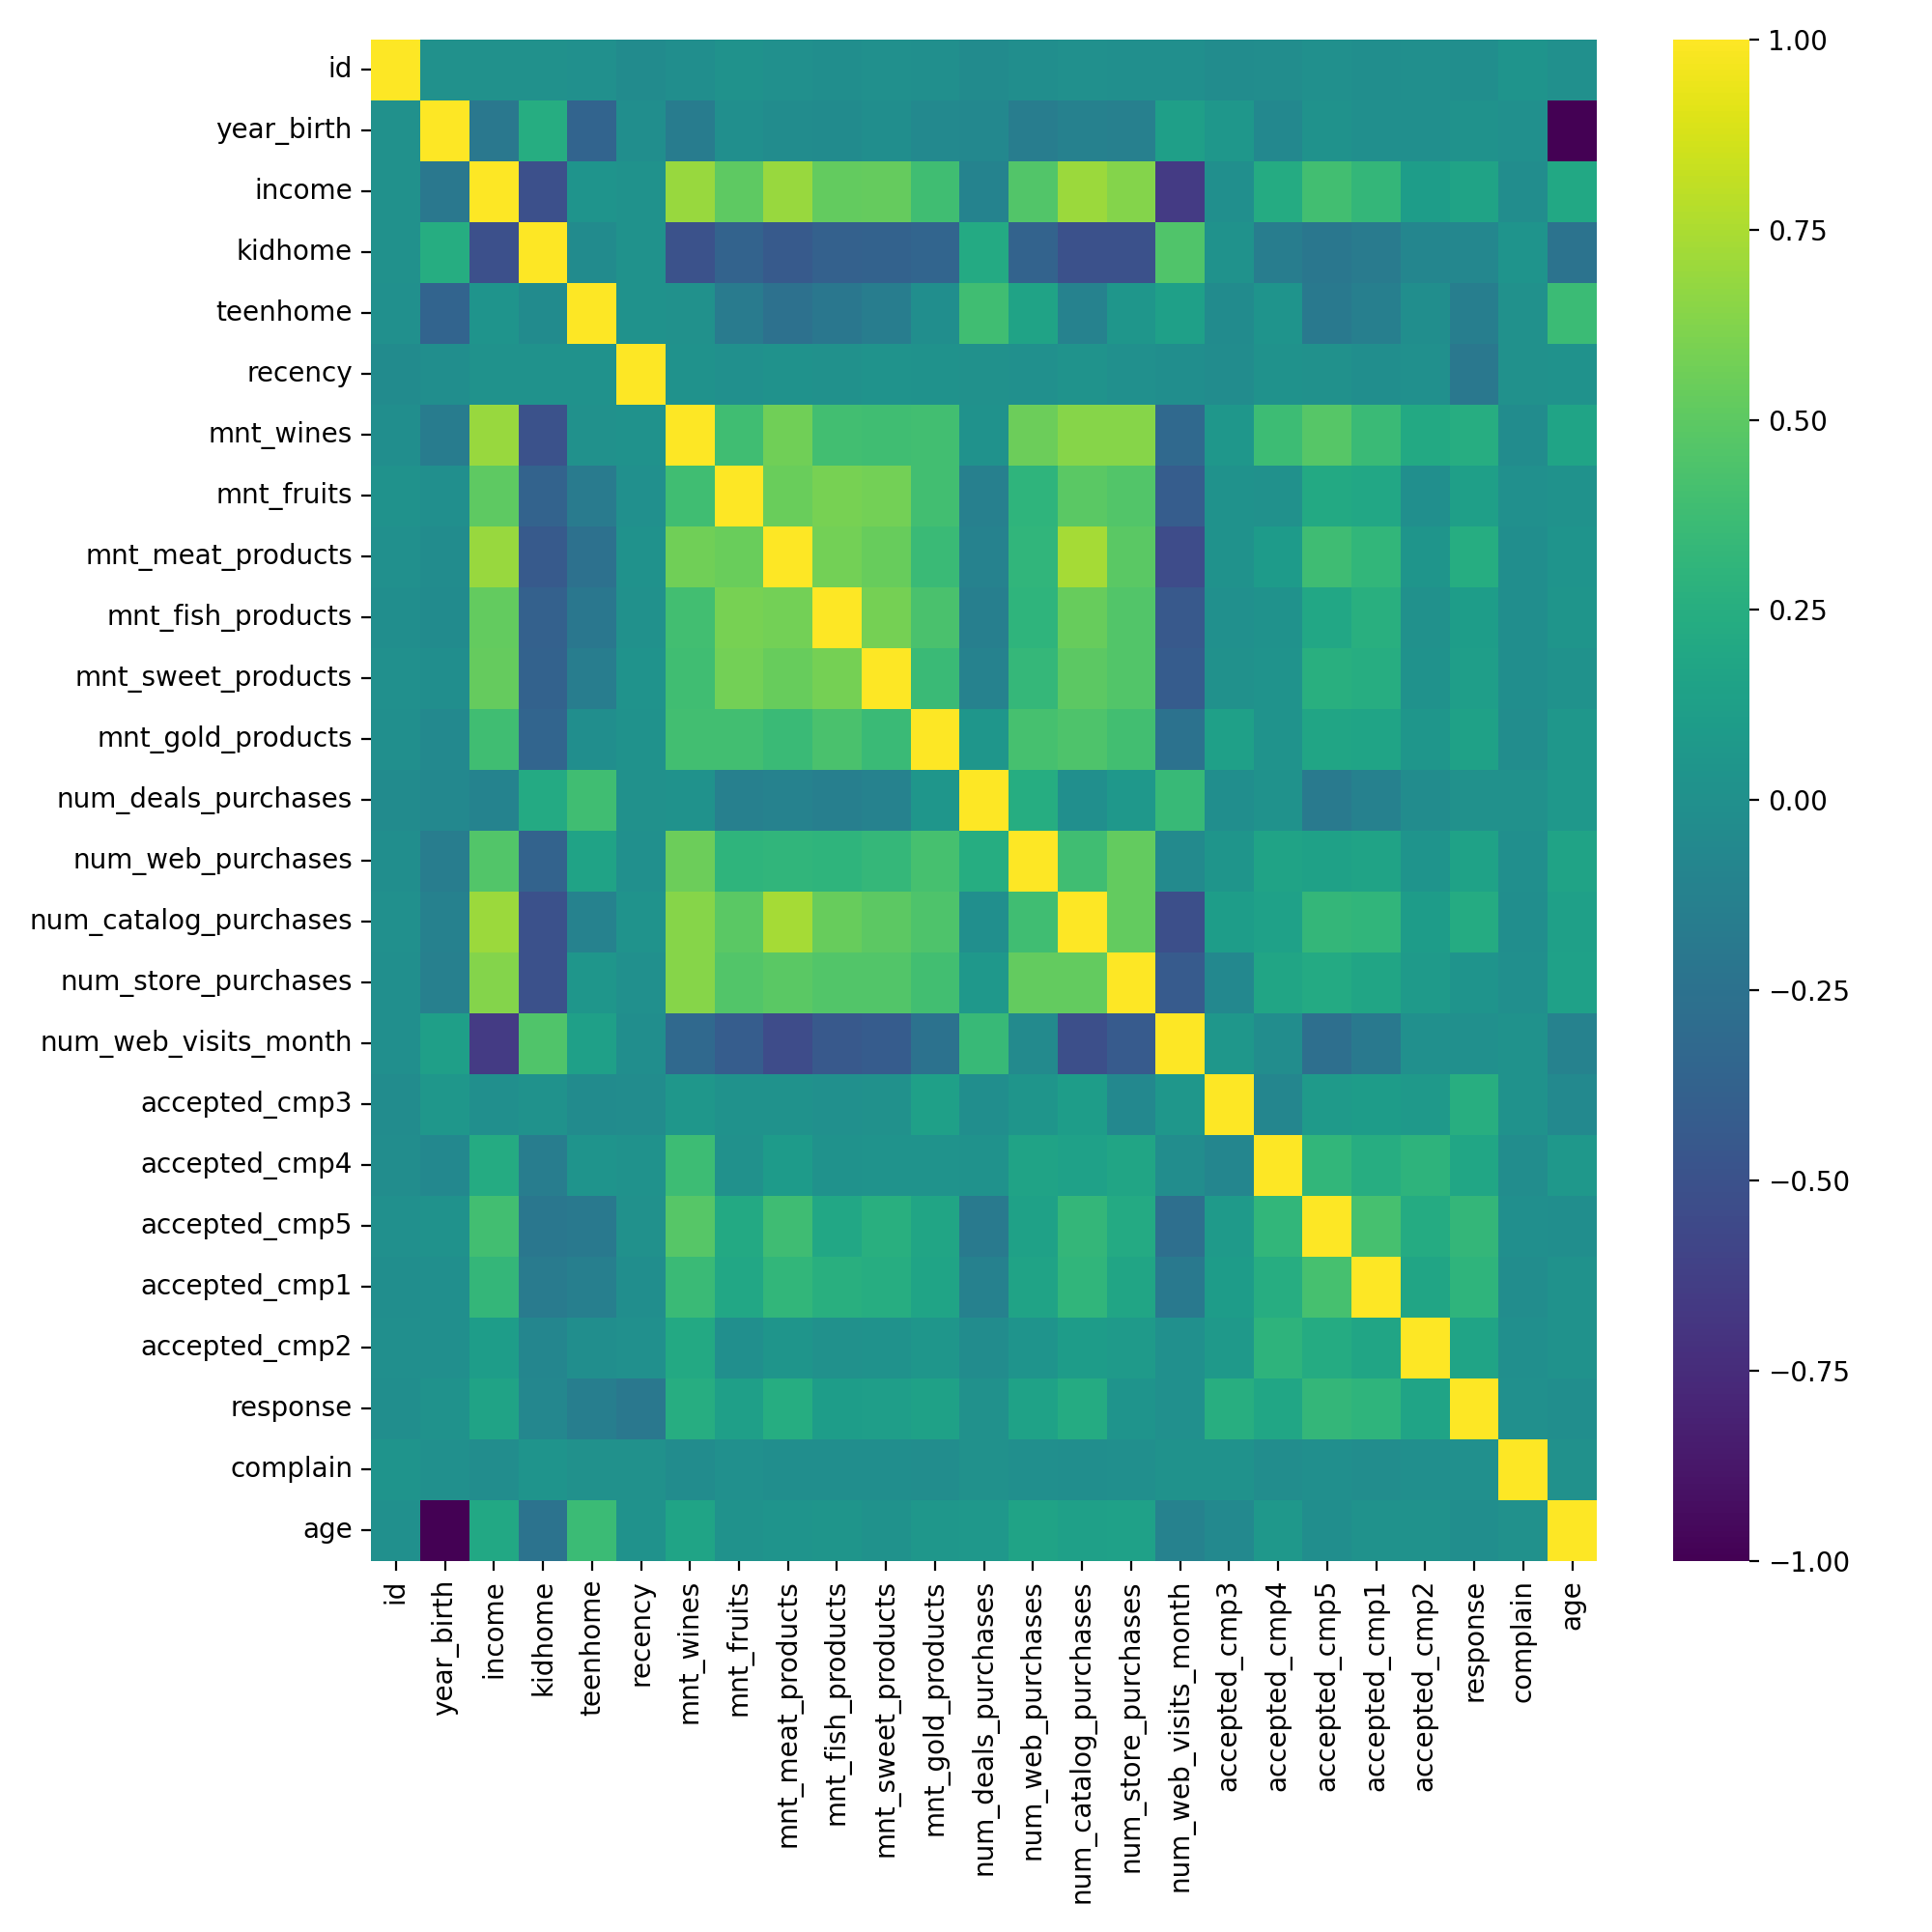

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(data=marketing.corr(),cmap = 'viridis',fmt='.2f')
plt.tight_layout()
plt.show()

Based on the histograms above, we can notice that most of the variables are right-skewed and have similar distributions.\
Based on the correlation matrix and the heatmap above, we can notice that most of the variables have a weak positive correlation to each other. However, there is a variability of correlations between numerical variables the `income` variable.

### Purchase and Income Relationship

<IPython.core.display.Javascript object>


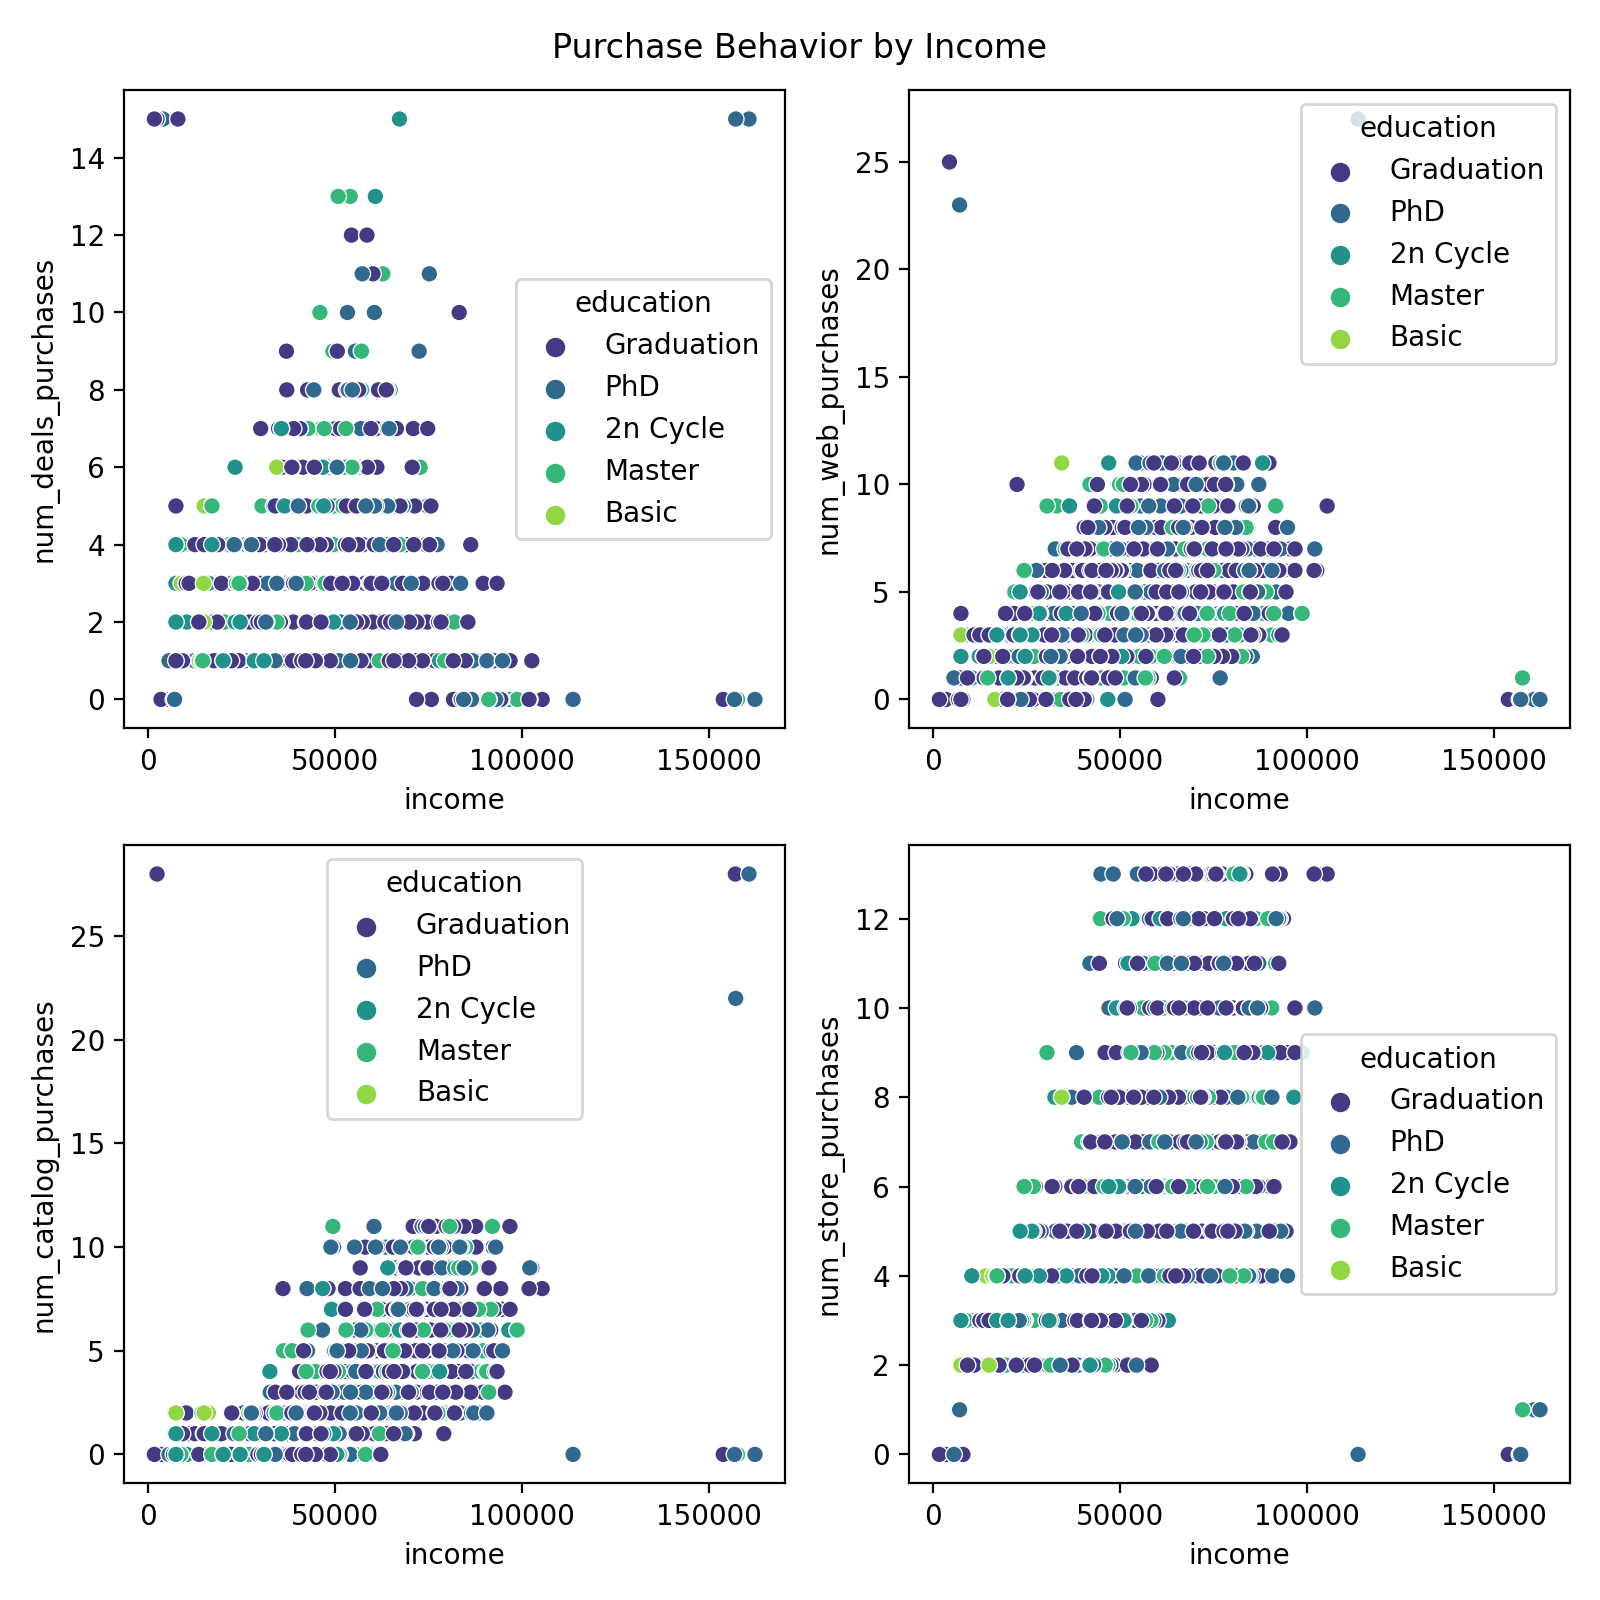

In [45]:
fig, axes = plt.subplots(2,2,figsize=(8,8))

sns.scatterplot(ax = axes[0,0],x=marketing["income"], y= marketing["num_deals_purchases"],
                hue = marketing['education'], palette="viridis")
sns.scatterplot(ax = axes[0,1],x=marketing["income"], y= marketing["num_web_purchases"], 
                hue = marketing['education'], palette="viridis")
sns.scatterplot(ax = axes[1,0],x=marketing["income"], y= marketing["num_catalog_purchases"],
                hue = marketing['education'], palette="viridis")
sns.scatterplot(ax = axes[1,1],x=marketing["income"], y= marketing["num_store_purchases"],
                hue = marketing['education'], palette="viridis")

fig.suptitle("Purchase Behavior by Income")
plt.tight_layout()
plt.show()

Based on the scatterplots above, it seems that there is a positive linear relationship between `income` and `num_catalog_purchases`, `num_web_purchases`, and `num_store_purchases` variables.<br> However, the relationship between `income` and `num_deals_purchases` does not seem clear; it may be considered as a weak relationship.<br> The `education` patterns in the four scatterplots do not seem easy to be determined; it might require further analysis.

<IPython.core.display.Javascript object>


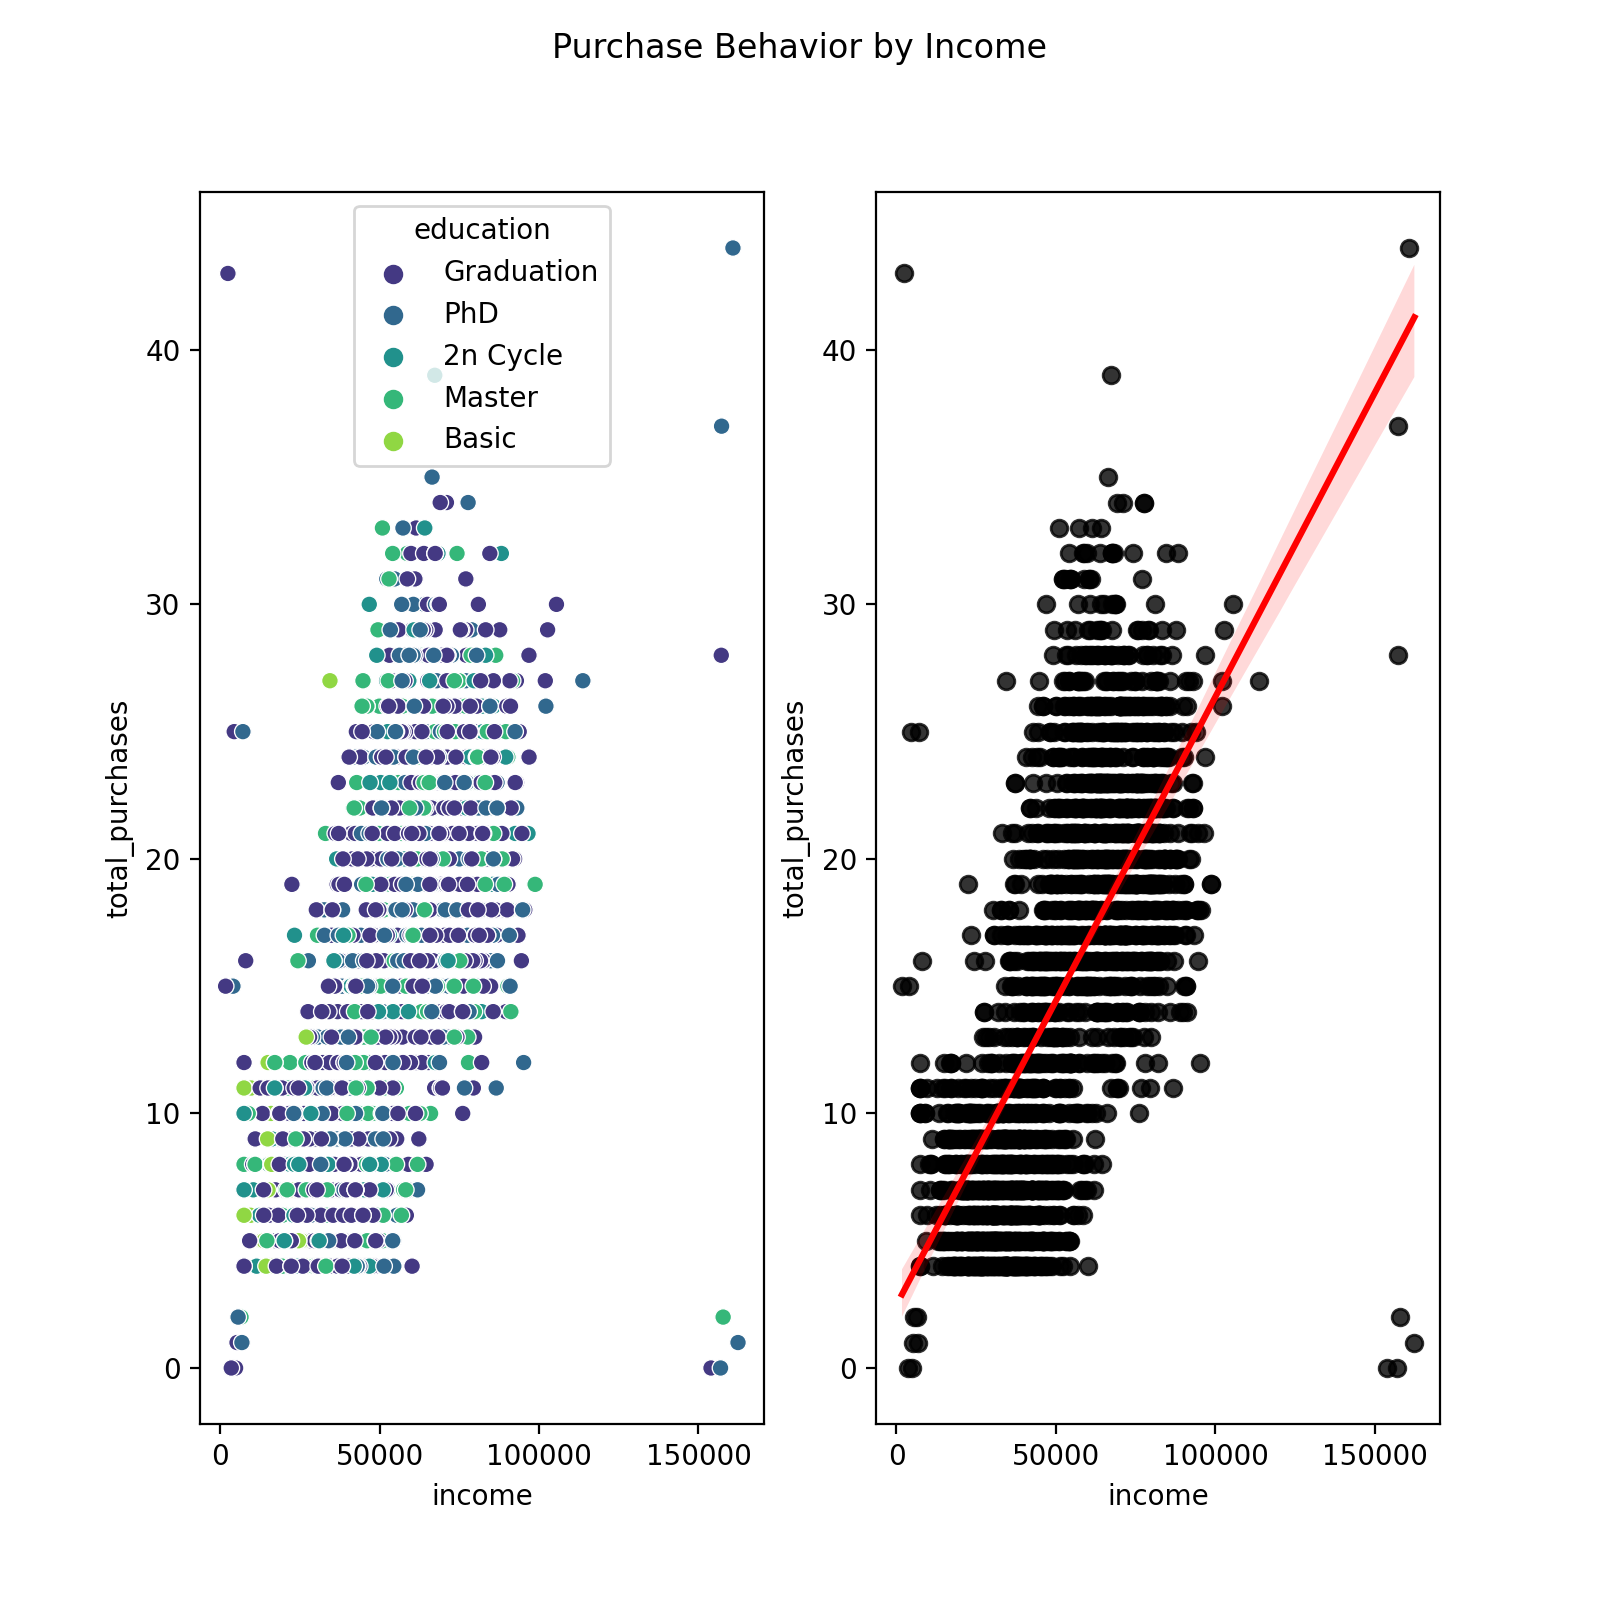

In [46]:
marketing['total_purchases'] = marketing['num_catalog_purchases'] + marketing['num_web_purchases'] + marketing['num_store_purchases'] + marketing['num_deals_purchases']
fig, axes = plt.subplots(1,2,figsize=(8,8))
sns.scatterplot(ax = axes[0],y=marketing["total_purchases"], x=marketing["income"], 
                hue=marketing['education'], palette="viridis")
sns.regplot(ax = axes[1],y=marketing["total_purchases"], x=marketing["income"], 
            scatter_kws={"color": "black"}, line_kws={"color": "red"})
fig.suptitle("Purchase Behavior by Income")
plt.show()

It seems that there is a positive strong linear relationship between `income` and `total_purchases`. Nevertheless, the `education` patterns are still unclear as the points are randomly plotted in the scatterplot.

## Purchase and Age Relationship

<IPython.core.display.Javascript object>


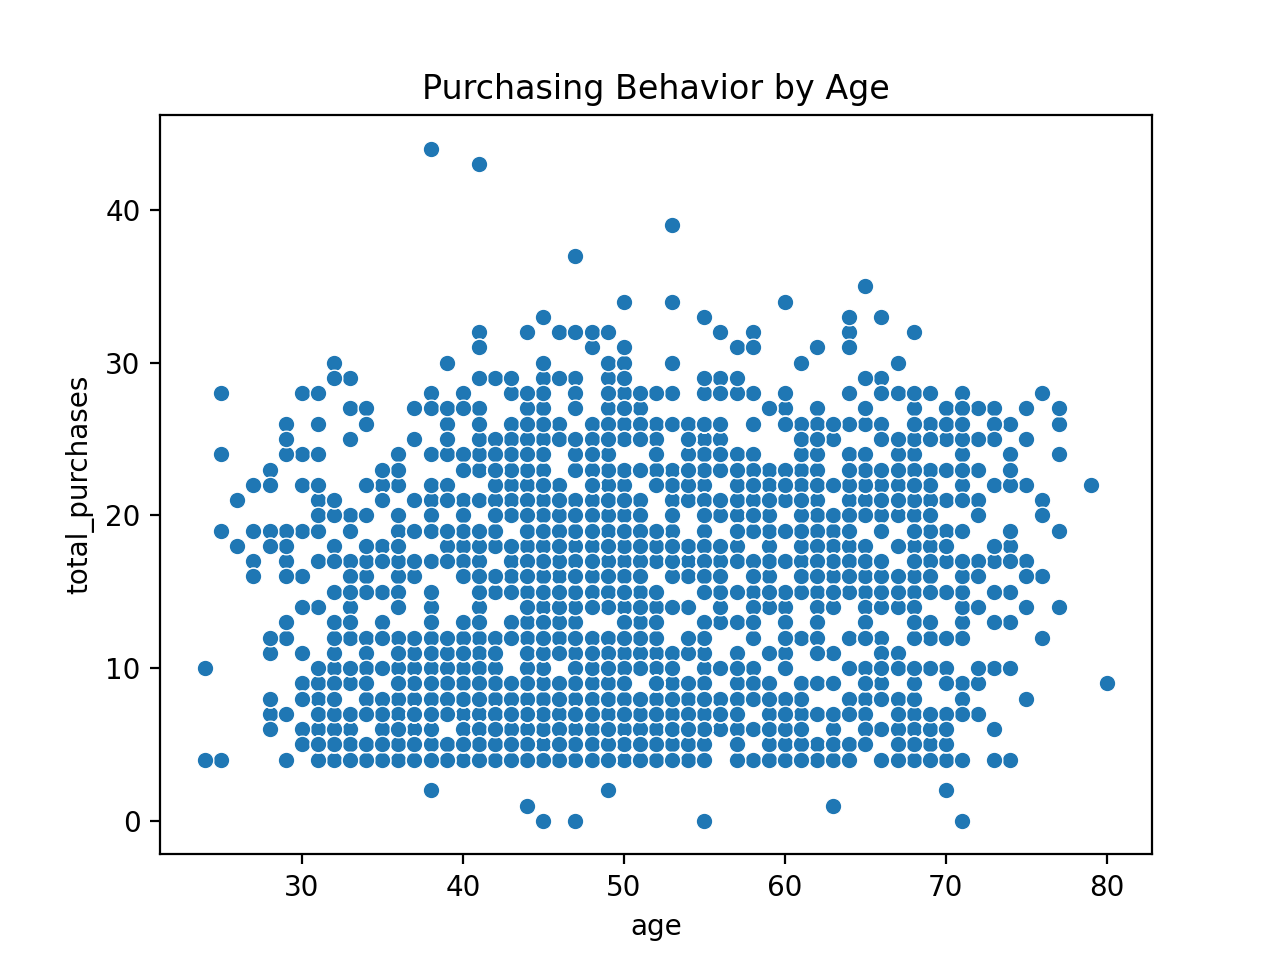

In [49]:
plt.figure()
sns.scatterplot(x=marketing["age"], y=marketing["total_purchases"], palette="viridis")
plt.title("Purchasing Behavior by Age")
plt.show()

Based on the scatterplot above, it does not seem clear the relationship between `total_purchases` and `age` variables.

<IPython.core.display.Javascript object>


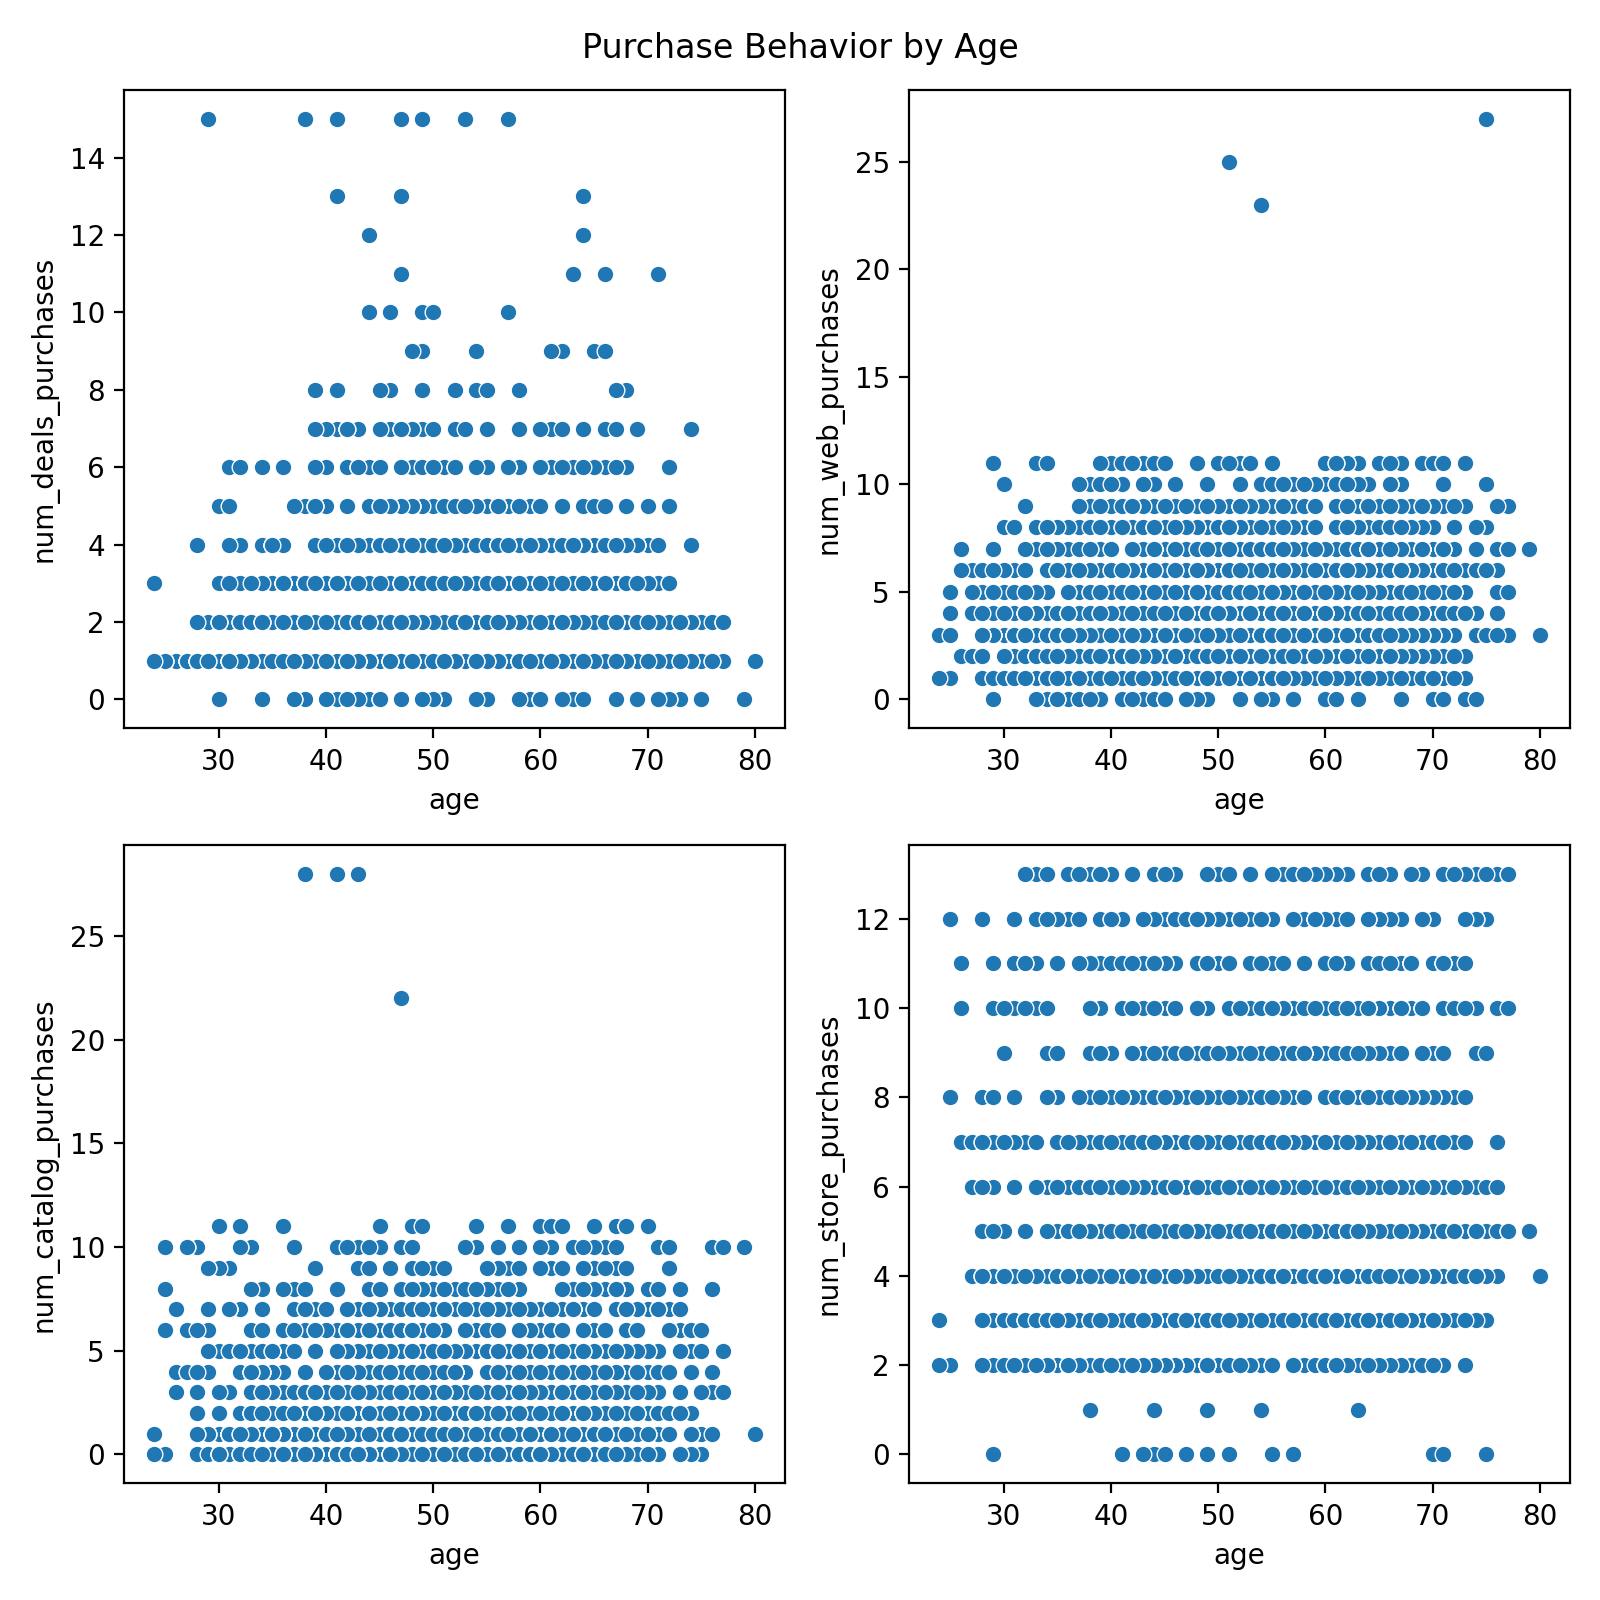

In [50]:
fig, axes = plt.subplots(2,2,figsize=(8,8))

sns.scatterplot(ax = axes[0,0],x=marketing["age"], y= marketing["num_deals_purchases"], palette="viridis")
sns.scatterplot(ax = axes[0,1],x=marketing["age"], y= marketing["num_web_purchases"], palette="viridis")
sns.scatterplot(ax = axes[1,0],x=marketing["age"], y= marketing["num_catalog_purchases"], palette="viridis")
sns.scatterplot(ax = axes[1,1],x=marketing["age"], y= marketing["num_store_purchases"], palette="viridis")

fig.suptitle("Purchase Behavior by Age")
plt.tight_layout()
plt.show()

Based on the different purchase types scatterplots displayed above, it is difficult to define the relationship between `age` and any type of purchases. It might be convenient to convert the `age` variable into a categorical variable by splitting `age` in different age groups.

In [51]:
age_group = []
for i in marketing['age']:
    if 20 <= i <= 35:
        age_group.append('20 to 35')
    elif 35 < i <= 50: 
        age_group.append('36 to 50')
    elif 50 < i <= 70:
        age_group.append('51 to 70')
    else:
        age_group.append('More than 70')
        
marketing['age_group'] = age_group
marketing['age_group'].unique()

array(['36 to 50', '51 to 70', '20 to 35', 'More than 70'], dtype=object)

<IPython.core.display.Javascript object>


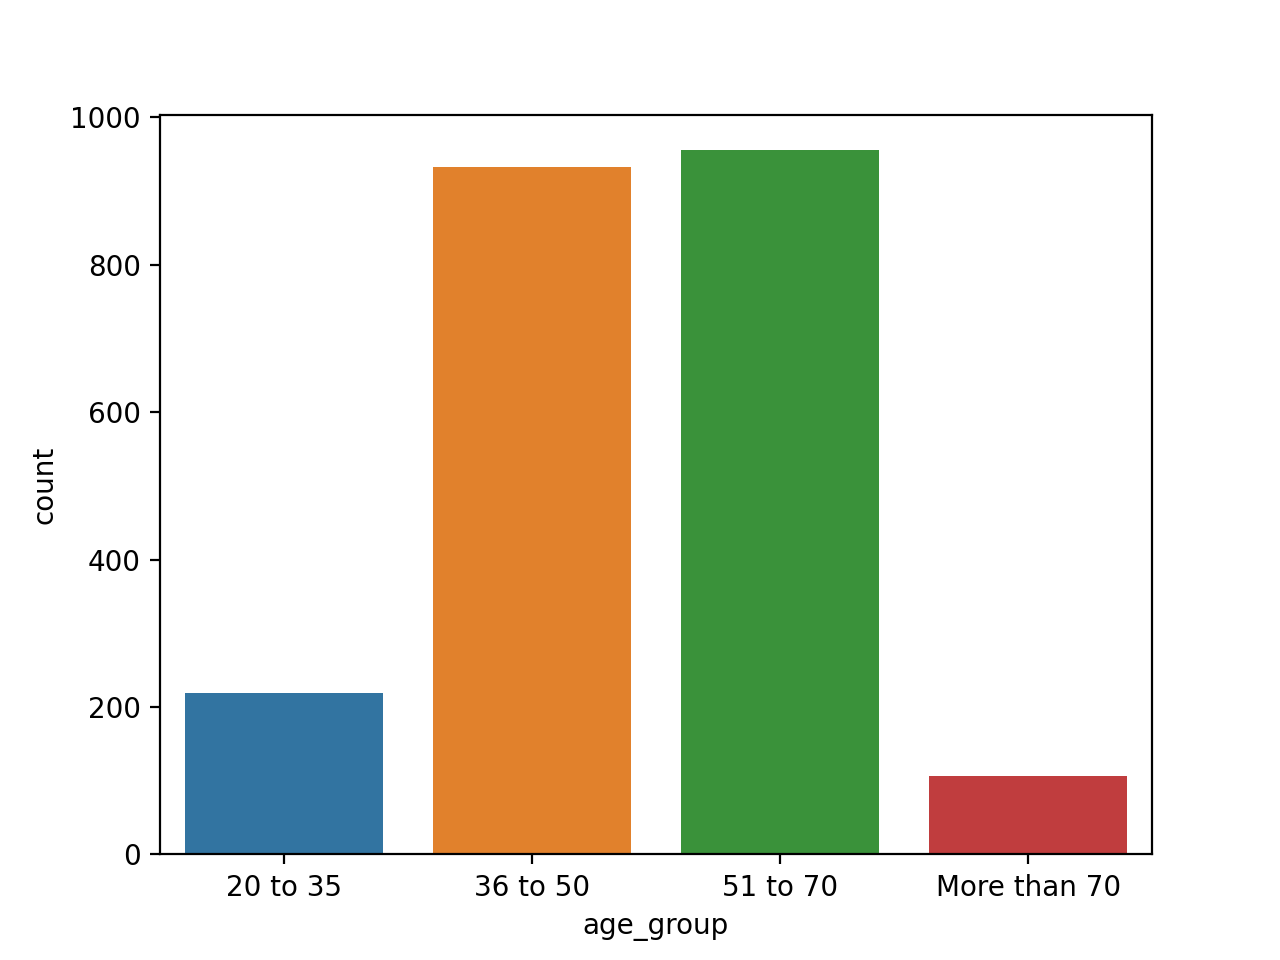

In [52]:
# plotting the age Group variable in a bar chart
ordered_ages = ['20 to 35', '36 to 50', '51 to 70', 'More than 70']
plt.figure()
sns.countplot(marketing['age_group'], order = ordered_ages)
plt.show()

Based on this barplot, it can be noticed that `36 to 50` and `51 to 70` age groups are the most dominating groups on store purchasing.<br>

In order to explore even further more, it might be necessary to create a subset of the dataset with the new variable `age_group`. 

In [54]:
age_amounts = marketing.loc[:, ('age', 'mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
'mnt_sweet_products', 'mnt_gold_products')]

age_bins = [20,35,50,70,100]
labels = ordered_ages

age_amounts['age_group'] = pd.cut(age_amounts.age, bins=age_bins, labels=labels)
age_amounts = age_amounts.groupby('age_group').sum().reset_index()

age_amounts.head()

age_group    age  mnt_wines  mnt_fruits  mnt_meat_products  \
0      20 to 35   6957      56038        6642              44974   
1      36 to 50  41074     237527       22553             137596   
2      51 to 70  57225     329022       25336             159619   
3  More than 70   7747      52709        3710              27281   

   mnt_fish_products  mnt_sweet_products  mnt_gold_products  
0               8801                6648               9271  
1              32303               23731              37050  
2              36399               25433              45998  
3               5776                4015               4845

<IPython.core.display.Javascript object>


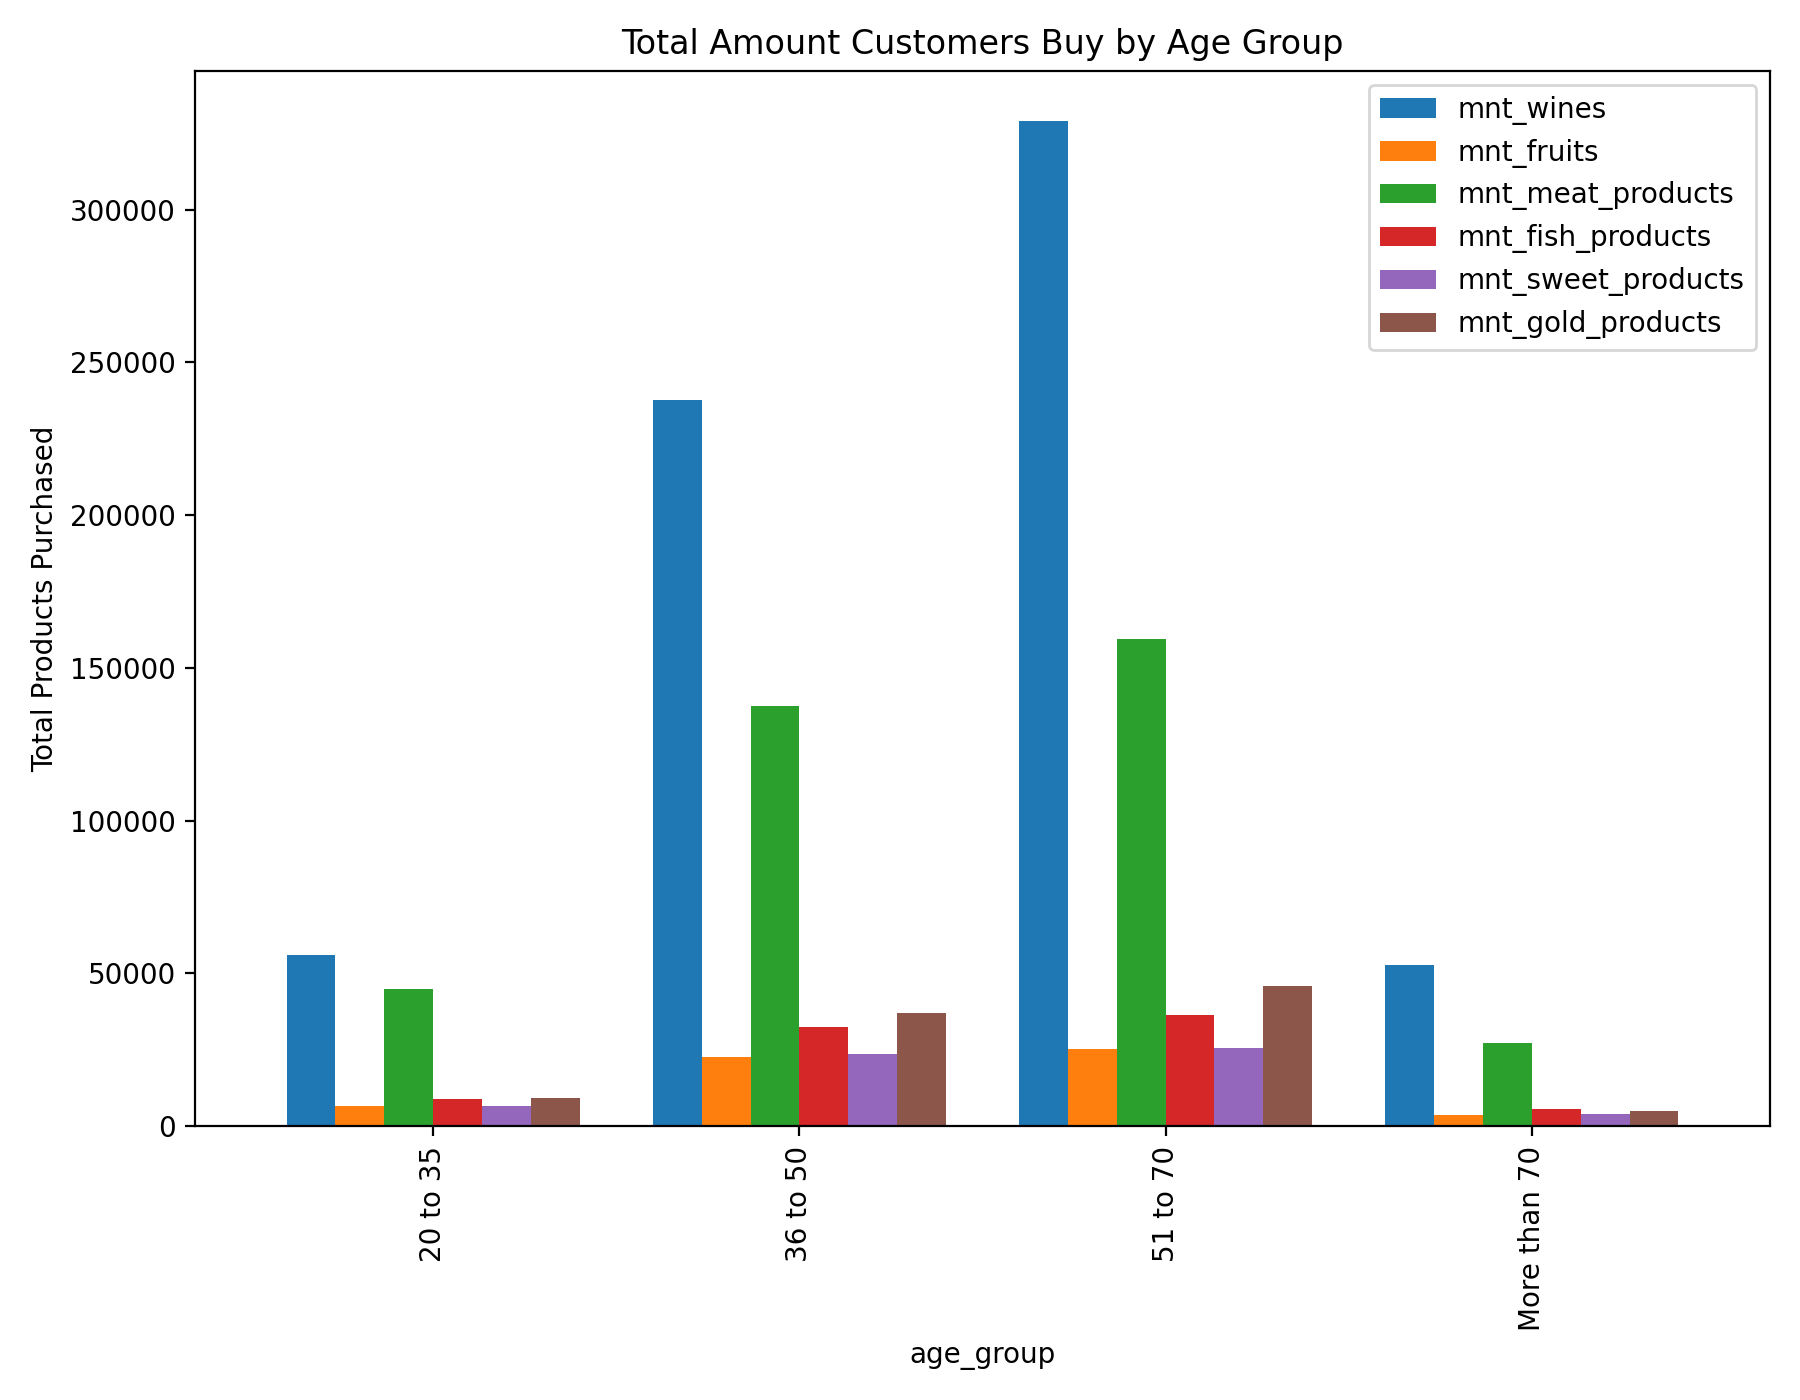

In [62]:
fig, axes = plt.subplots(figsize = (9,7))

products = ['mnt_wines', 'mnt_fruits', 'mnt_meat_products', 'mnt_fish_products', 
'mnt_sweet_products', 'mnt_gold_products']

age_amounts.plot(x = 'age_group', y = products, kind = 'bar', ax = axes, width = .8)
plt.title("Total Amount Customers Buy by Age Group")
plt.ylabel("Total Products Purchased")
plt.tight_layout()
plt.show()

Based on these barplots, it can be noticed that `wine` is the most purchased product among the four age groups.<br>
`meat` is the second most purchased product among the four age groups.<br>
And `fruit` is the least purchased product among the four age groups.

<IPython.core.display.Javascript object>


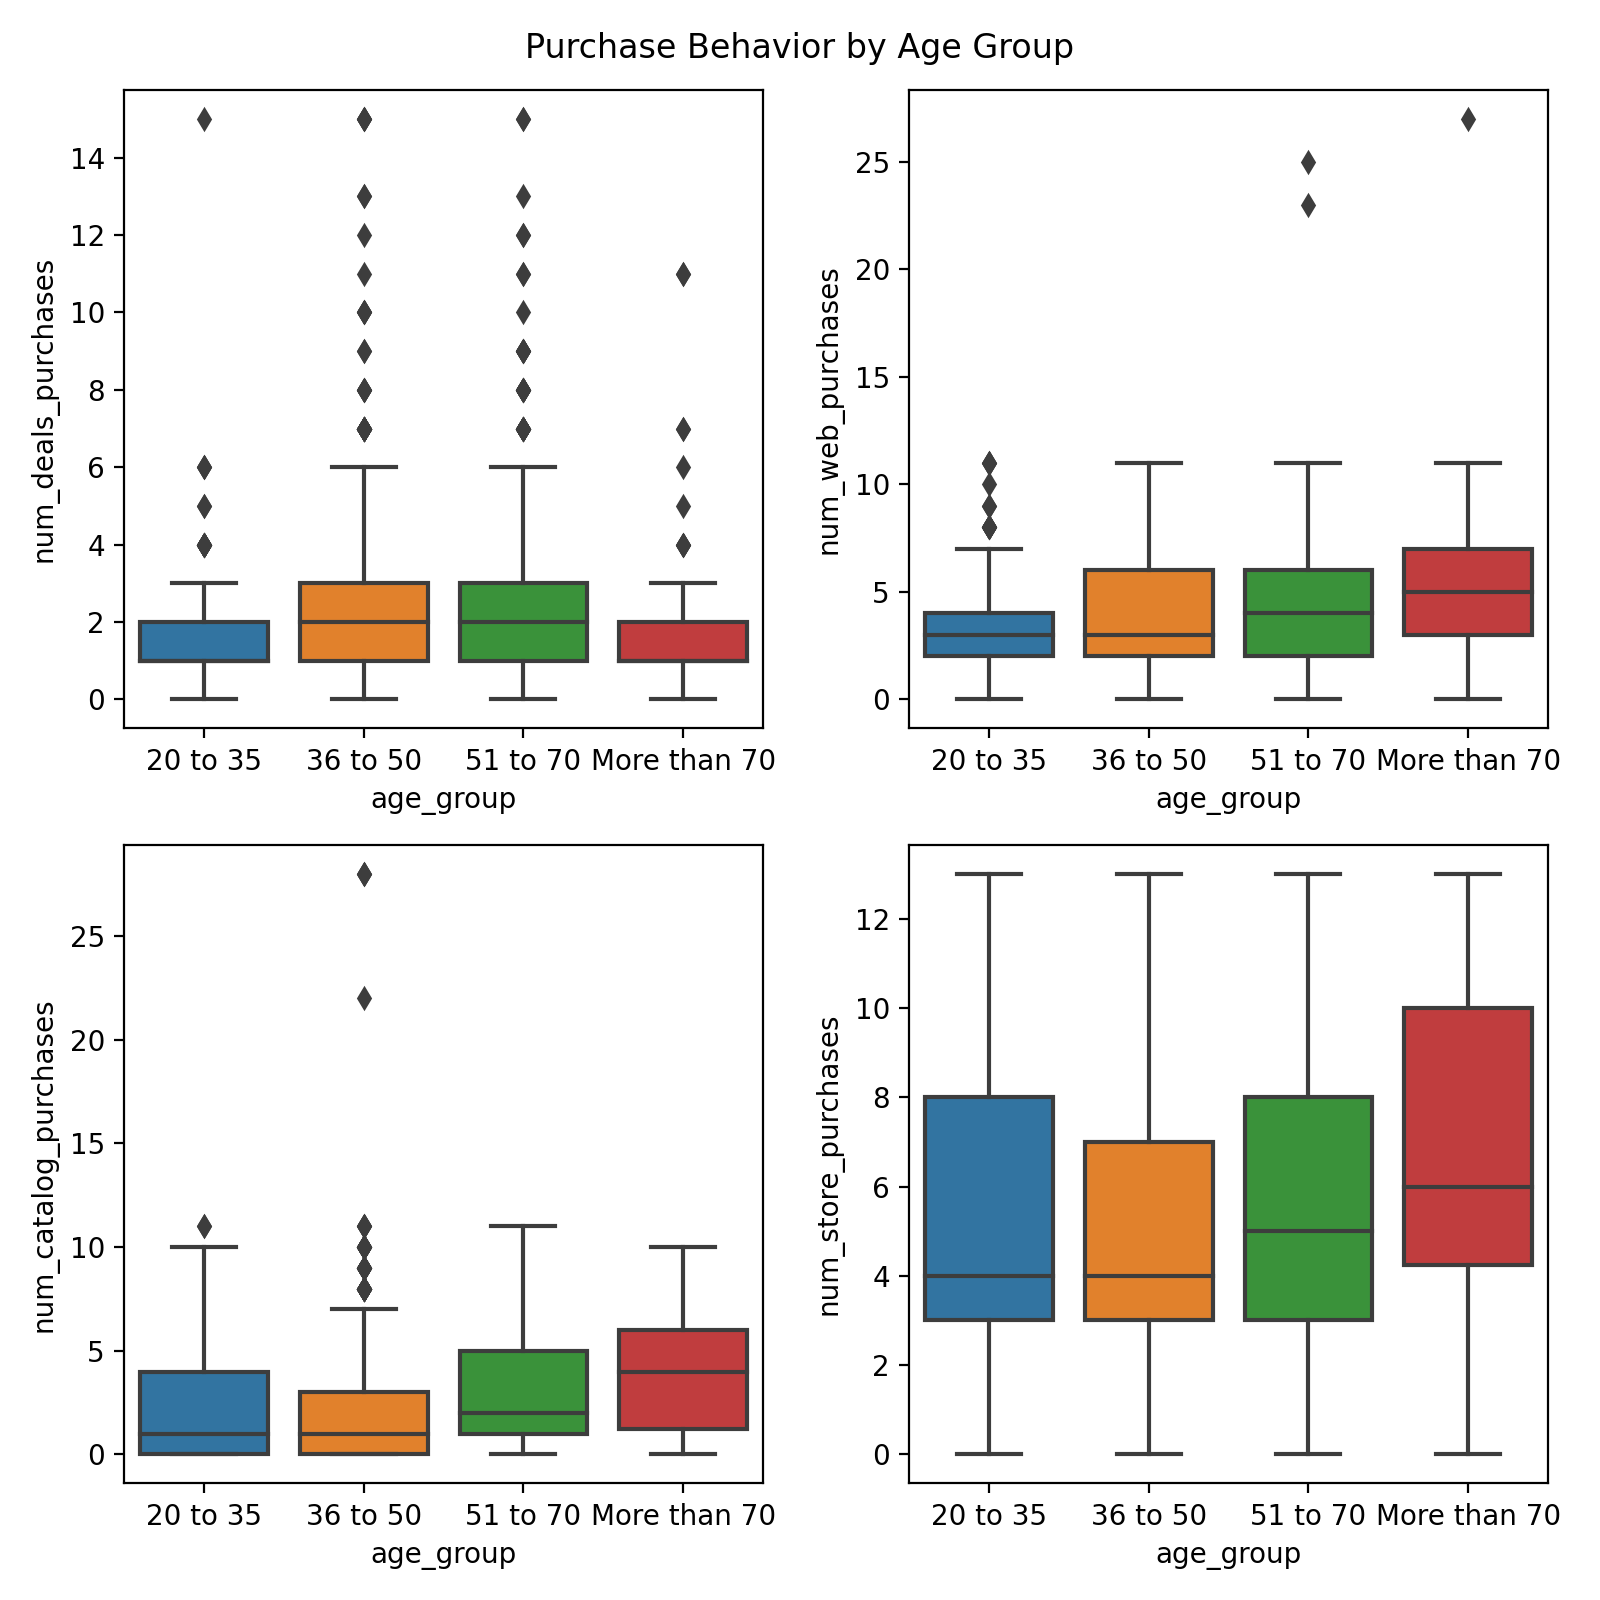

In [63]:
fig, axes = plt.subplots(2,2,figsize=(8,8))

sns.boxplot(ax = axes[0,0],x=marketing["age_group"], y= marketing["num_deals_purchases"],order = ordered_ages)
sns.boxplot(ax = axes[0,1],x=marketing["age_group"], y= marketing["num_web_purchases"],order = ordered_ages)
sns.boxplot(ax = axes[1,0],x=marketing["age_group"], y= marketing["num_catalog_purchases"],order = ordered_ages)
sns.boxplot(ax = axes[1,1],x=marketing["age_group"], y= marketing["num_store_purchases"],order = ordered_ages)

fig.suptitle("Purchase Behavior by Age Group")
plt.tight_layout()
plt.show()

Based on these boxplots, are some interesting insights:

* `18 to 35` and `More than 70` groups tend to be the least interested in deals purchases.
* On average, `More than 70` group customers tend to shop the most online, in store, and through the catalog.
* `36 to 50` and `51 to 70` groups are more interested in deals. It might be because they receive more deals based on loyal customers.

This analysis could be very helpful for a marketing department; some strategies could be used to increase the customers of the age groups that are less interested in purchases for the store.

## Conclusion

It has been demostrated that `income` variable has a strong positive linear relationship with customers' purchase behavior. Interesting insights could be found based on the analysis performed to the `education`, `age`, and `age_group` variables; such insights could be very helpful for market strategies to increase the sales of different products and to increase the number of customers for purchasing different itmes.

## Next Steps

There were some other variables that have not been analyzed yet; some future analysis is considered for customer marital status, geographical data, and customer complains.